In [16]:
rm(list=ls())
library(ggplot2)
library(dplyr)
library(cowplot)
load("Fig2_EWAS_data.RData")
ls()
head(Himba_Baka_combined_V2)


[1] "Himba_Baka_combined_V2" "Himba_KHS_combined_V2"  "KHS_Baka_combined_V2"

,Himba_V2,Baka_V2,row.names,sig_in_any
,<dbl>,<dbl>,<chr>,<dbl>
1,-513.91601,-111.72381,cg27666123,0
2,-249.19643,-245.26507,cg27666046,0
3,-35.43716,-260.20087,cg27665985,0
4,-970.73132,198.15808,cg27665925,0
5,-24.74894,-196.84180,cg27665860,0
6,250.18162,-78.63956,cg27665829,0


In [17]:
##correlation of effect sizes for significant age-associated CpGs in any of the 3 populations
KHS_Baka_cor <- cor(KHS_Baka_combined_V2[KHS_Baka_combined_V2$sig_in_any == 1, "KHS_V2"], KHS_Baka_combined_V2[KHS_Baka_combined_V2$sig_in_any == 1, "Baka_V2"])

Himba_KHS_cor <- cor(Himba_KHS_combined_V2[Himba_KHS_combined_V2$sig_in_any == 1, "KHS_V2"], Himba_KHS_combined_V2[Himba_KHS_combined_V2$sig_in_any == 1, "Himba_V2"])

Himba_Baka_cor <- cor(Himba_Baka_combined_V2[Himba_Baka_combined_V2$sig_in_any == 1, "Himba_V2"], Himba_Baka_combined_V2[Himba_Baka_combined_V2$sig_in_any == 1, "Baka_V2"])


[1] 397576

[1] 19127

[1] 365501

[1] 57105

[1] 356942

[1] 59799

Warning message in plot_theme(plot):
"The `legen.position` theme element is not defined in the element hierarchy."
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Effect Size in â€¡Khomani San' in 'mbcsToSbcs': dot substituted for <e2>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Effect Size in â€¡Khomani San' in 'mbcsToSbcs': dot substituted for <80>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Effect Size in â€¡Khomani San' in 'mbcsToSbcs': dot substituted for <a1>"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Effect Size in â€¡Khomani San' in 'mbcsToSbcs': dot substituted for <e2>"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Effect Size in â€¡Khomani San' in 'mbcsToSbcs': dot s

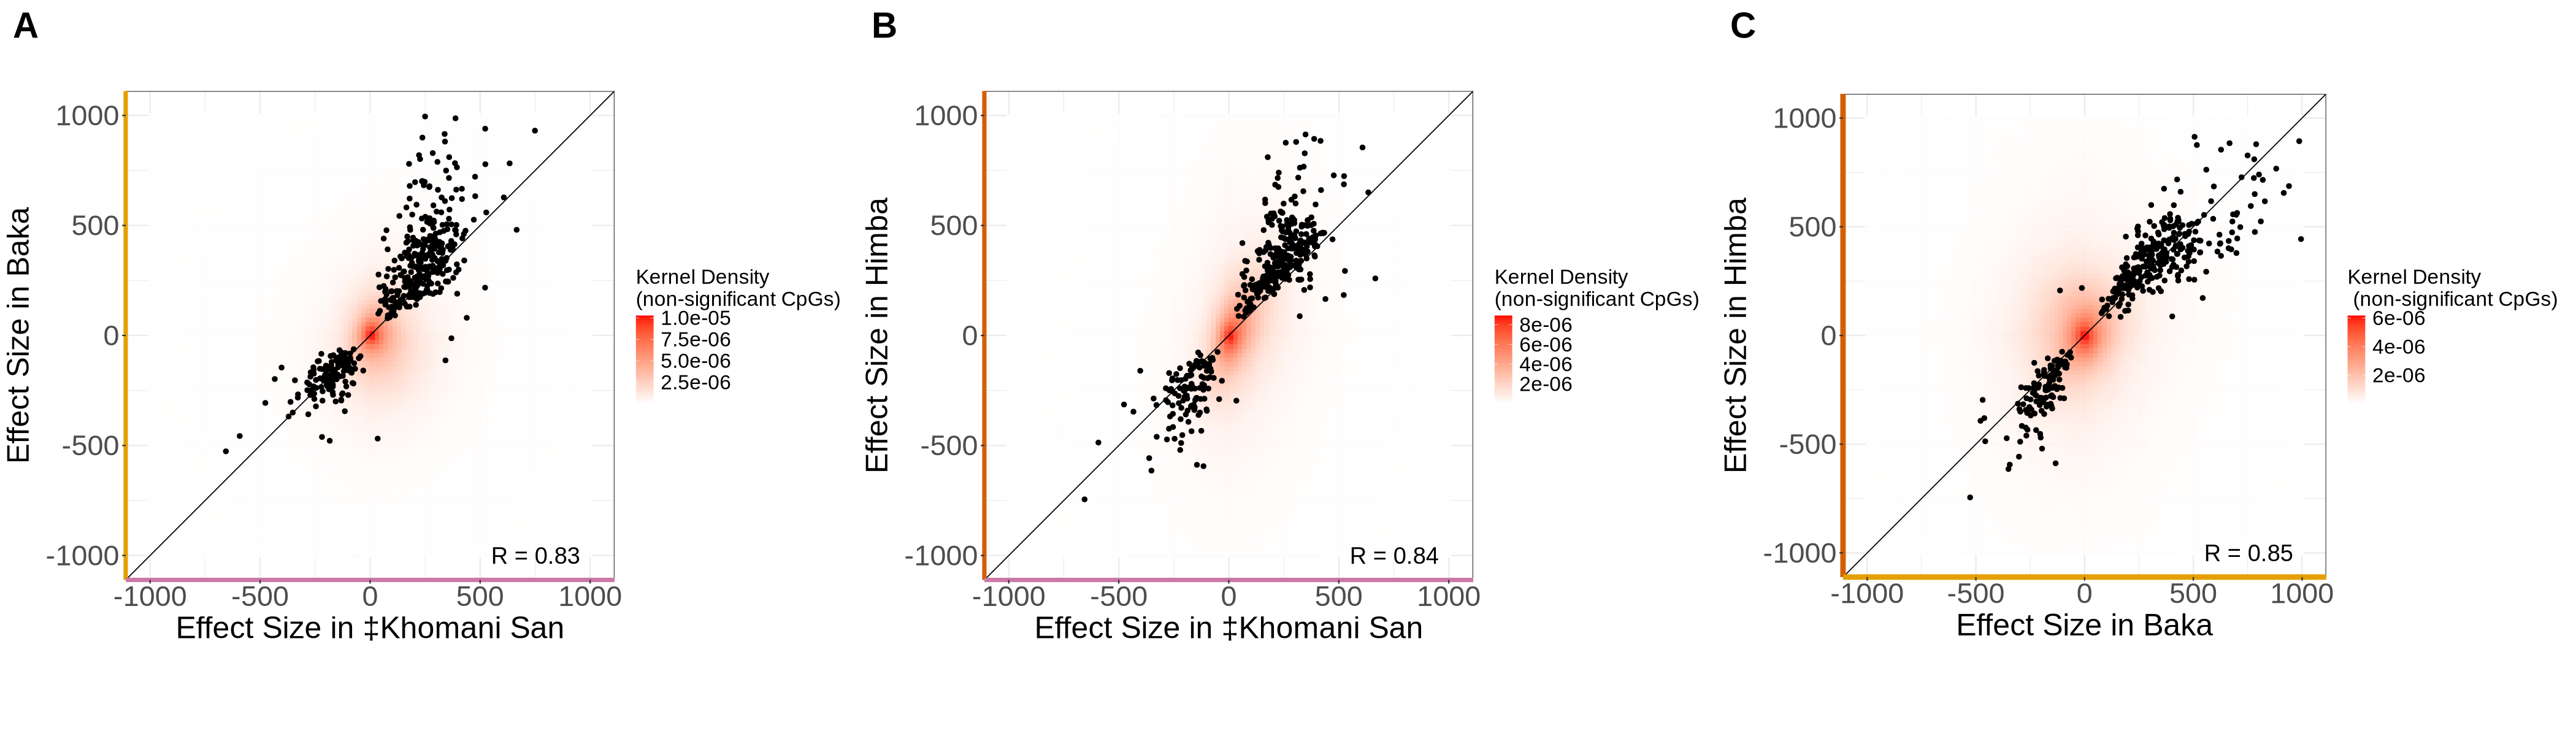

In [18]:
#### Updated Figure 2
options(repr.plot.width = 35, repr.plot.height = 10)
load("Fig2_EWAS_data.RData")
#pop colors same as figure 1######################
popColours <- c("Himba" = rgb(213/255, 94/255, 0/255), # red
                "KHS" = rgb(204/255, 121/255, 167/255), # purple/magenta
                "Baka" = rgb(230/255, 159/255, 0/255), # orange
                "Hispanic/Latino" = rgb(86/255, 180/255, 233/255), # blue
                "European" = rgb(0/255, 159/255, 115/255)) # green
###############################################
##### KHS vs Baka###
nrow(KHS_Baka_combined_V2)
nrow(KHS_Baka_combined_V2[abs(KHS_Baka_combined_V2$KHS_V2) > 1000 | abs(KHS_Baka_combined_V2$Baka_V2) > 1000, ])
###limit to effect sizes less than 1000 or the range of points is to big to see the density scale
##comment this line out to plot all points###########
KHS_Baka_combined_V2 <- KHS_Baka_combined_V2[abs(KHS_Baka_combined_V2$KHS_V2) < 1000 & abs(KHS_Baka_combined_V2$Baka_V2) < 1000, ]
####################################################
plot1 <- KHS_Baka_combined_V2 %>% {
ggplot(., aes(x = KHS_V2, y = Baka_V2)) +
     stat_density_2d(
      data = . %>% filter(sig_in_any == "0"),
      aes(fill = ..density..),  # Use the count of points for the fill
      geom = "tile",
      contour = FALSE,
      show.legend = TRUE,
      alpha = 0.9
    ) +
     scale_fill_gradient(
      low = "white", high = "red",  # Gradient from white to red
      name = "Kernel Density\n(non-significant CpGs)"             # Add a name for the legend
    ) +
    #scale_fill_grey(start = 1, end = 0.2) +  #adjusts the difference in color between the highest and lowest density
    geom_point(data = . %>% filter(sig_in_any == "1"), color = "black", size = 2) +  ###plots significant points in red
    geom_abline(colour = "black", slope = 1) +  ###one to one line
    labs(
       y = "Effect Size in Baka", x = "Effect Size in \u2021Khomani San")+
     coord_equal() +
    theme_bw(base_size = 14) +  # Set a base font size for the entire plot
    theme(
        legend.title =element_text(size = 20),
        legend.text = element_text(size = 20),
      axis.line.y.left = element_line(
        colour = popColours["Baka"], size = 2  ##increased thickness of axes line to highlight color
      ),
      axis.line.x.bottom = element_line(
        colour = popColours["KHS"], size = 2
      ),
      plot.title = element_text(size = 18, face = "bold"),  # Larger title
      axis.title = element_text(size = 30),                # Larger axis titles
      axis.text = element_text(size = 28)                  # Larger axis labels
    ) +
     annotate(
      "text",
      x = max(.$KHS_V2) * 0.55, y = min(.$Baka_V2),  # Adjust position of correlation as needed
      label = paste0("R = ", round(KHS_Baka_cor, 2)),
      size = 8, color = "black", hjust = 0
    )
}
##### KHS vs Himba###
nrow(Himba_KHS_combined_V2)
nrow(Himba_KHS_combined_V2[abs(Himba_KHS_combined_V2$KHS_V2) > 1000 | abs(Himba_KHS_combined_V2$Himba_V2) > 1000, ])
###limit to effect sizes less than 1000 or the range of points is to big to see the density scale
##comment this line out to plot all points###########
Himba_KHS_combined_V2 <- Himba_KHS_combined_V2[abs(Himba_KHS_combined_V2$KHS_V2) < 1000 & abs(Himba_KHS_combined_V2$Himba_V2) < 1000, ]
######################3##############################
plot2 <- Himba_KHS_combined_V2 %>% {
  ggplot(., aes(KHS_V2, Himba_V2)) +
      stat_density_2d(
      data = . %>% filter(sig_in_any == "0"),
      aes(fill = ..density..),  # Use the count of points for the fill
      geom = "tile",
      contour = FALSE,
      show.legend = TRUE,
      alpha = 0.9
    ) +
     scale_fill_gradient(
      low = "white", high = "red",  # Gradient from white to red
      name = "Kernel Density\n(non-significant CpGs)"             # Add a name for the legend
    ) +
    geom_point(data = . %>% filter(sig_in_any == "1"), color = "black", size = 2) +
    geom_abline(colour = "black", slope = 1) + 
    labs(
       y = "Effect Size in Himba", x = "Effect Size in \u2021Khomani San")+
     coord_equal() +
    theme_bw(base_size = 14) + 
    theme(legend.title =element_text(size = 20),
        legend.text = element_text(size = 20),
      axis.line.y.left = element_line(
        colour = popColours["Himba"], size = 2
      ),
      axis.line.x.bottom = element_line(
        colour = popColours["KHS"], size = 2
      ),
      plot.title = element_text(size = 18, face = "bold"),  
      axis.title = element_text(size = 30),                
      axis.text = element_text(size = 28)                  
    ) +
     annotate(
      "text",
      x = max(.$KHS_V2) * 0.55, y = min(.$Himba_V2), 
      label = paste0("R = ", round(Himba_KHS_cor, 2)),
      size = 8, color = "black", hjust = 0
    )
}

##### Baka vs Himba###
nrow(Himba_Baka_combined_V2)
nrow(Himba_Baka_combined_V2[abs(Himba_Baka_combined_V2$Baka_V2) > 1000 | abs(Himba_Baka_combined_V2$Himba_V2) > 1000, ])
###limit to effect sizes less than 1000 or the range of points is to big to see the density scale
##comment this line out to plot all points###########
Himba_Baka_combined_V2 <- Himba_Baka_combined_V2[abs(Himba_Baka_combined_V2$Baka_V2) < 1000 & abs(Himba_Baka_combined_V2$Himba_V2) < 1000, ]
#####################################################
plot3 <- Himba_Baka_combined_V2 %>% {
  ggplot(., aes(Baka_V2, Himba_V2)) +
      stat_density_2d(
      data = . %>% filter(sig_in_any == "0"),
      aes(fill = ..density..),  # Use the count of points for the fill
      geom = "tile",
      contour = FALSE,
      show.legend = TRUE,
      alpha = 0.9, bins=100,  binwidth = c(50, 50)
    ) +
     scale_fill_gradient(
      low = "white", high = "red",  # Gradient from white to red
      name = "Kernel Density\n (non-significant CpGs)"             # Add a name for the legend
    ) +
    geom_point(data = . %>% filter(sig_in_any == "1"), color = "black", size = 2) +
    geom_abline(colour = "black", slope = 1) + 
    labs(
       y = "Effect Size in Himba", x = "Effect Size in Baka")+
     coord_equal() +
    theme_bw(base_size = 14) +  
    theme(legen.position ="bottom",
        legend.title =element_text(size = 20),
        legend.text = element_text(size = 20),
      axis.line.y.left = element_line(
        colour = popColours["Himba"], size = 2.5
      ),
      axis.line.x.bottom = element_line(
        colour = popColours["Baka"], size = 2.5
      ),
      plot.title = element_text(size = 18, face = "bold"),  
      axis.title = element_text(size = 30),               
      axis.text = element_text(size = 28)                 
    ) +
     annotate(
      "text",
      x = max(.$Baka_V2) * 0.55, y = min(.$Himba_V2), 
      label = paste0("R = ", round(Himba_Baka_cor, 2)),
      size = 8, color = "black", hjust = 0
    )
}
# Combine the plots
fig2 <- plot_grid(plot1, plot2, plot3, ncol = 3, nrow = 1, labels = c("A", "B", "C"), label_size = 35, rel_widths = c(1, 1, 1))
fig2

[1] 3221


Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


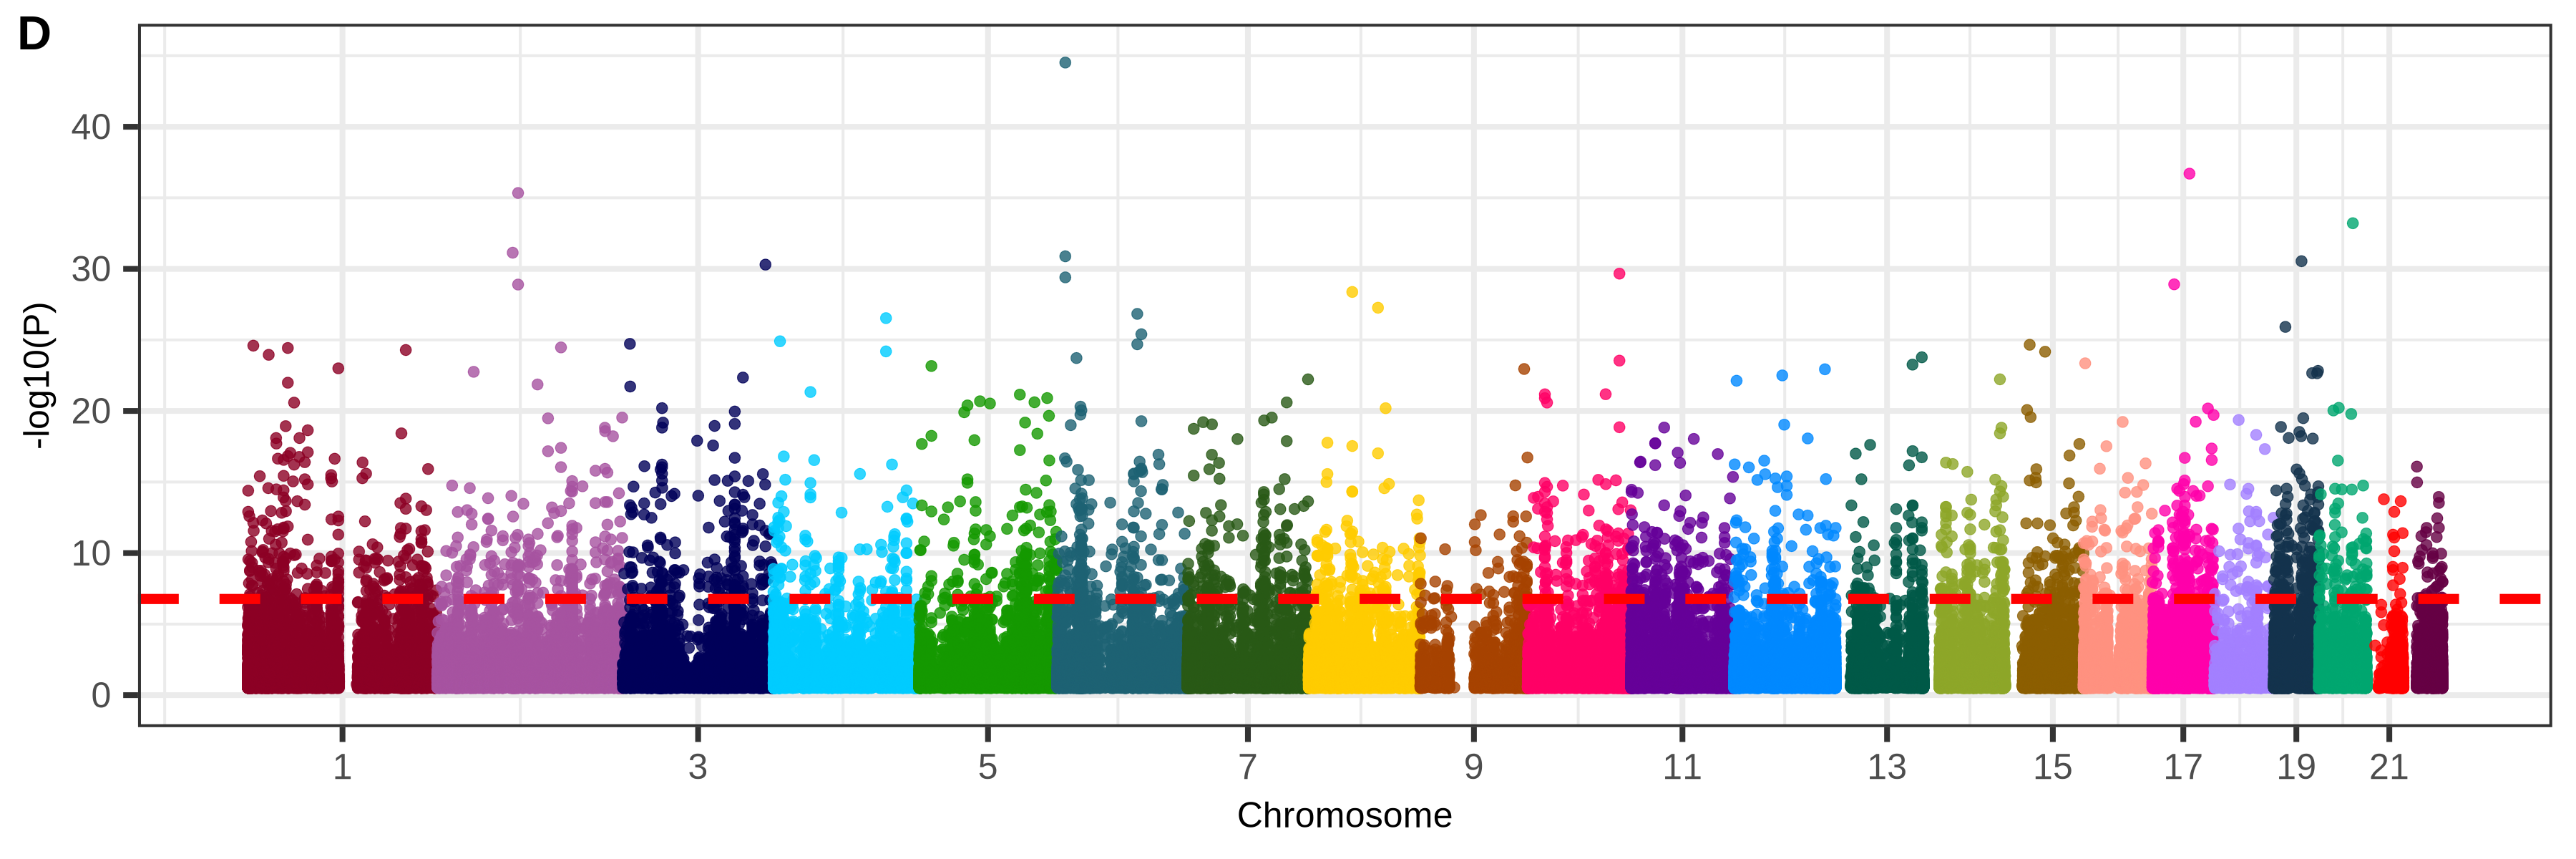

In [19]:
#load CpG probe info with chromosome position information
load("probeinfo.RData")
#load meta-analyis EWAS p-values
load("Fig2_meta_ewas_p_vals.RData")

sig <- subset(meta_gen, P.value.fix < .05/nrow(meta_gen))
print(nrow(sig))
n <- .05 / nrow(sig)

# Prepare data for ggplot2
testinfo <- meta_gen[, c(1, 3, 4)]
site.info <- probe.info[probe.info$TargetID %in% testinfo$CPG.Labels,]
testinfo <- testinfo %>% rename(label = 1, sig_pvalue = 2)
site.info <- site.info %>% rename(TargetID = TargetID, CHR = CHR, MAPINFO = MAPINFO)

# Merge testinfo and site.info
merged_data <- merge(testinfo, site.info, by.x = "label", by.y = "TargetID")

# Convert chromosomes to numeric values
merged_data$CHR <- as.character(merged_data$CHR)
merged_data$CHR[merged_data$CHR == "X"] <- 23
merged_data$CHR[merged_data$CHR == "Y"] <- 24
merged_data$CHR <- as.numeric(merged_data$CHR)

merged_data$BP <- as.numeric(merged_data$MAPINFO)
merged_data$P <- merged_data$sig_pvalue
gwasResults <- merged_data
# Prepare the dataset
manhattan <- gwasResults %>%
  # Compute chromosome size
  group_by(CHR) %>%
  summarise(chr_len = max(BP)) %>%
  # Calculate cumulative position of each chromosome
  mutate(tot = cumsum(chr_len) - chr_len) %>%
  select(-chr_len) %>%
  # Add this info to the initial dataset
  left_join(gwasResults, ., by = c("CHR" = "CHR")) %>%
  # Add a cumulative position of each SNP
  arrange(CHR, BP) %>%
  mutate(BPcum = BP + tot) %>%
  # Filter SNP to make the plot lighter
  filter(-log10(P) > 0.5)

# Prepare X axis
axisdf <- manhattan %>% 
  group_by(CHR) %>% 
  summarize(center = (max(BPcum) + min(BPcum)) / 2)

# Filter to include every other chromosome
filtered_axisdf <- axisdf %>% filter(row_number() %% 2 == 1)

# Prepare text description for each SNP
alpha <- 0.05 / nrow(gwasResults)
threshold <- -log10(alpha)

# Make the plot
p <- ggplot(manhattan, aes(x = BPcum, y = -log10(P))) +
  # Show all points
  geom_point(aes(color = as.factor(CHR)), alpha = 0.8, size = 4) +
  scale_color_manual(values = rep(c("#8c0025", "#a653a0", "#000059", "#00ccff", "#149900", "#1d6273",
                                    "#285916", "#ffcc00", "#a64200", "#ff0066", "#660099", "#0088ff",
                                    "#005947", "#8da629", "#8c5e00", "#ff9180", "#ff00aa", "#a280ff",
                                    "#13324d", "#00a66f", "#ff0000", "#660044", "#686080", "#eeff00"), 
                                  length(unique(gwasResults$CHR)))) +
  # Custom X axis
  scale_x_continuous(label = filtered_axisdf$CHR, breaks = filtered_axisdf$center) +
  scale_y_continuous(expand = c(0, 0)) +     # remove space between plot area and x axis
  ylim(0, 45) +
  # Add genome-wide significance threshold line
  geom_hline(yintercept = threshold, linetype = "dashed", color = "red", size = 4) +
  # Custom the theme
 theme_bw(base_size = 50) + 
  theme(legend.position = "none",
         axis.text = element_text(size = 30),
        axis.title = element_text(size = 30, margin = margin(r = 10)),
        plot.title = element_text(size = 50 ), plot.margin = margin(t = 20, r = 20, b = 20, l = 20)) + labs(x = "Chromosome")

# Create the combined plot
options(repr.plot.width = 30, repr.plot.height = 10)

cow_D <- plot_grid(p, nrow = 1, ncol = 1, labels = c("D"), label_size = 40)

# Add black border
cow_D <- cow_D + theme(plot.background = element_rect(color = "black"))

# Display the combined plot
cow_D


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Effect Size in â€¡Khomani San' in 'mbcsToSbcs': dot substituted for <e2>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Effect Size in â€¡Khomani San' in 'mbcsToSbcs': dot substituted for <80>"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Effect Size in â€¡Khomani San' in 'mbcsToSbcs': dot substituted for <a1>"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Effect Size in â€¡Khomani San' in 'mbcsToSbcs': dot substituted for <e2>"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"conversion failure on 'Effect Size in â€¡Khomani San' in 'mbcsToSbcs': dot substituted for <80>"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
"conversi

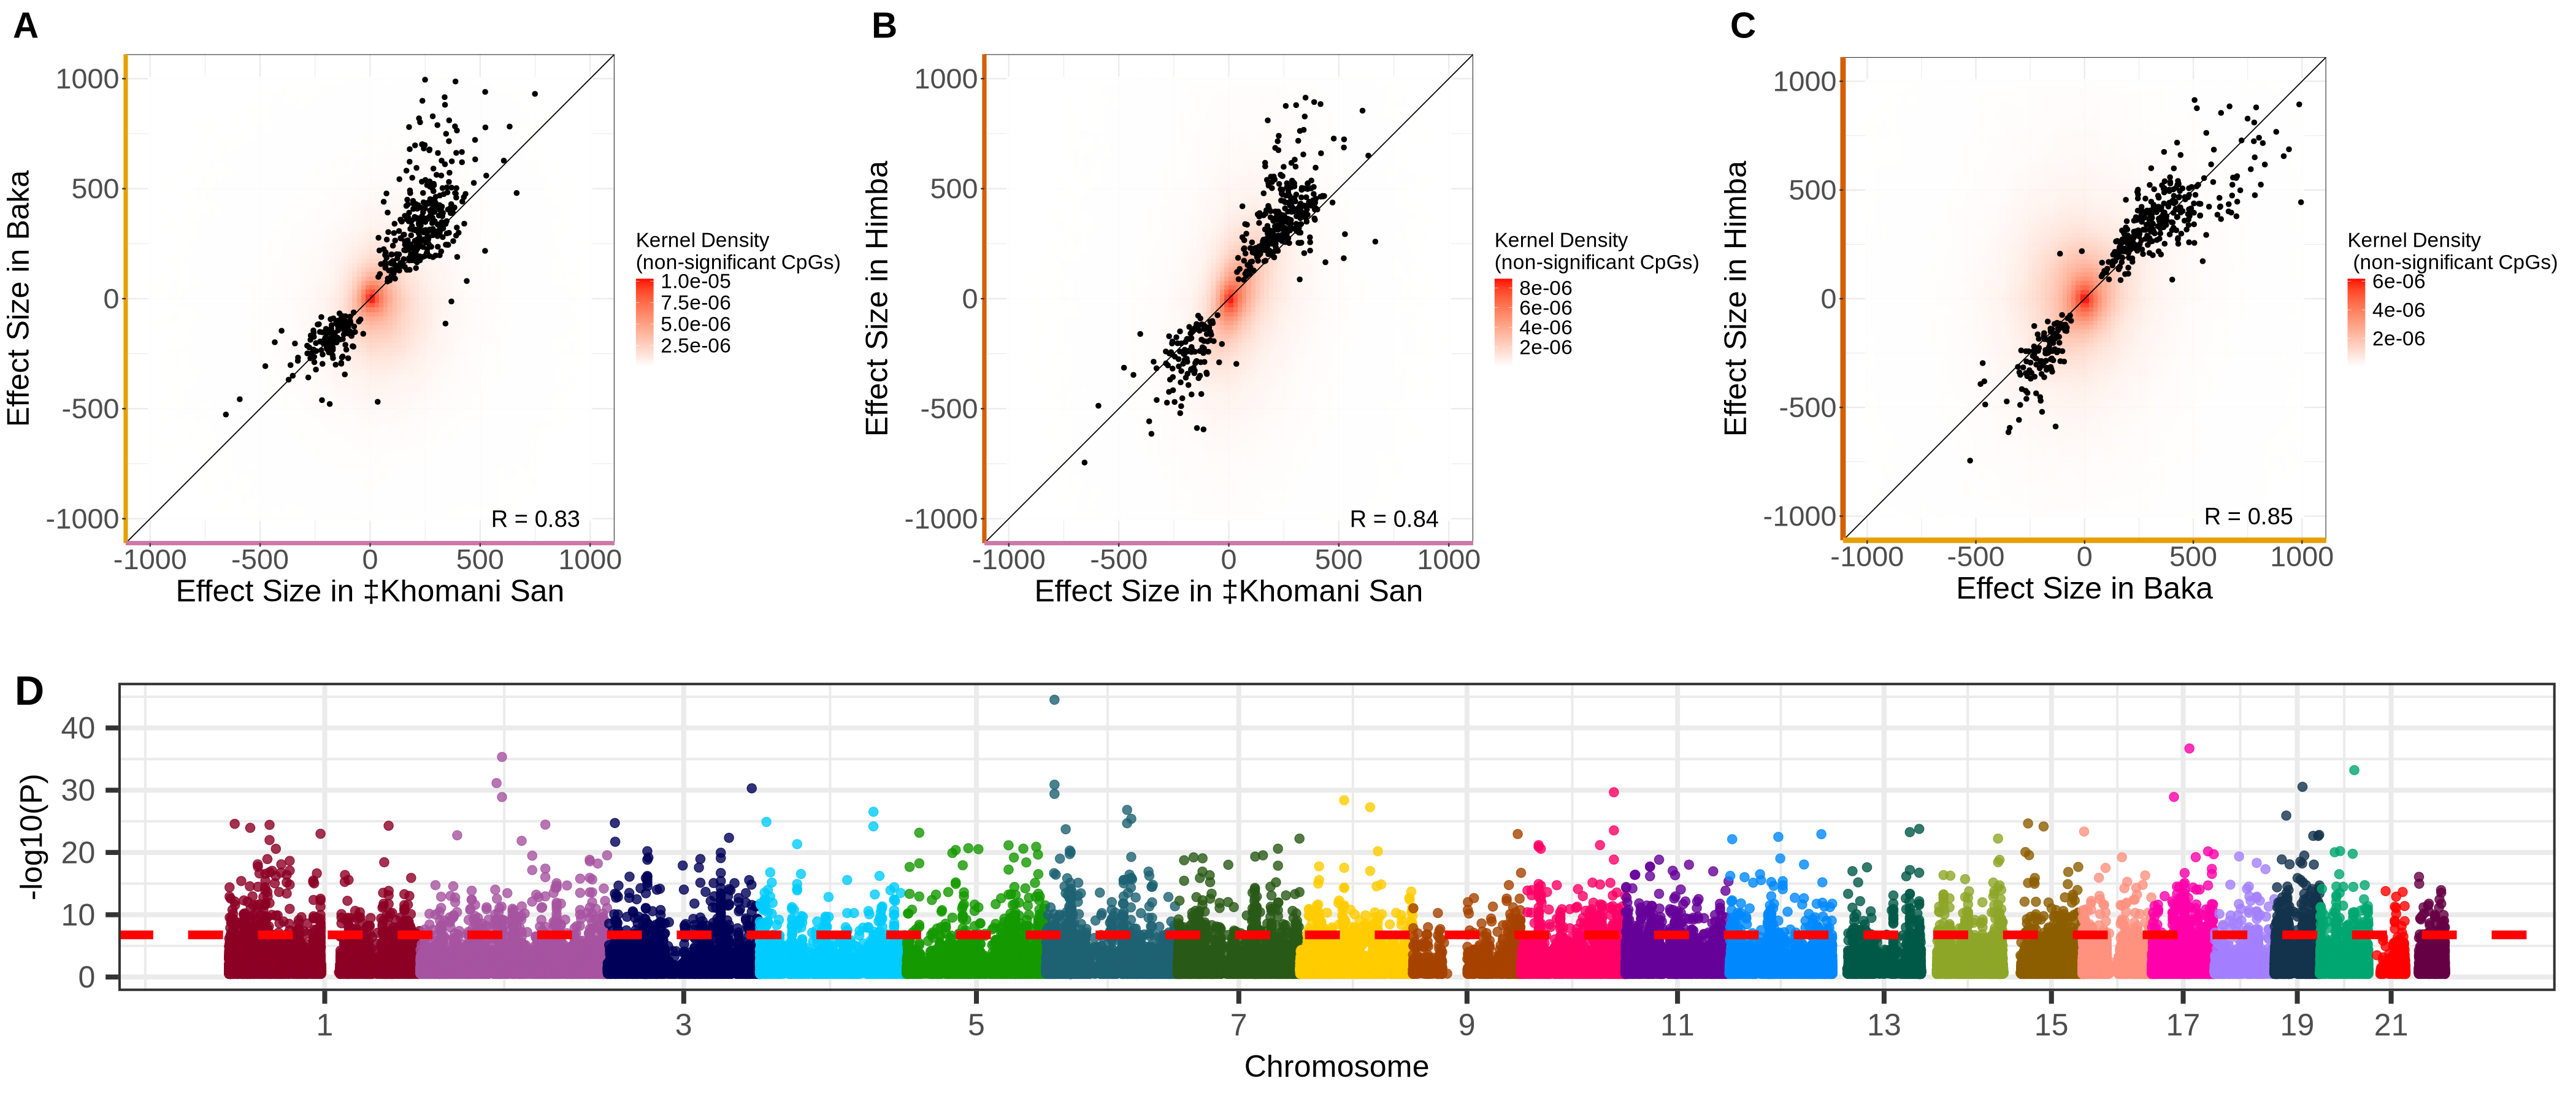

In [20]:
options(repr.plot.width = 35, repr.plot.height = 15)
plot_grid(fig2, cow_D, nrow = 2, rel_heights=c(1.2, .8))